## Data Definition
- Commutted by e-car :
0 - No, 1 - Yes
- Educational Background:
Science -1, Arts-2, Commerce-3, Engg/Tech-4, Others-5
- Student Gender:
Male -1, Female-2
- Own a Car:
1- Yes, 2- No
- Own a e-bike:
1- Yes, 2-NO
- Own a e-car:
1-Yes, 2-No
- Student Region:
East-1, West-2, North-3, South-4
- Annual Family Income in INR:
< 5 Lakhs-1, 5-10 Lakhs-2, >10 Lakhs-3
- Work Experience in Years:
0 year-1, <1 year-2, 1-5 years-3
- Student\'s Age:
Age of students mainly between 20 to 29
- All other variables ranges between 1 to 5: 1-Strongly disagree and 5-Strongly Agree
    1. DRIVING CONVENIENCE (DC)
    - I think sufficient battery charging points are available on highways (DC1)
    - I think adequate service centres are available for e-cars (DC2)
    - I think the range (the distance travelled in a single charge) of e-cars is adequate for me (DC3)
    - I think charging speed of e-cars is adequate (DC4)
    2. TECHNICAL ATTRIBUTES (TA)
    - I think e-cars are sleek (TA1)
    - I think e-cars are durable (TA2)
    - I think e-cars are available in different size, colours and designs (TA3)
    - I think e-cars are aesthetically appealing (TA4)
    - I think e-cars are technologically superior (TA5)
    - I think e-cars give comfortable ride (TA6)
    3. GOVERNMENT POLICY (GP)
    - I think that the government is providing incentives for the purchase of e-cars (GP1)
    - I think that the government is providing subsidies to the manufacturers (GP2)
    - I think the government is incentivizing research and development in electric vehicle technologies (GP3)
    - I think the government is investing on the establishment of electric vehicle charging points (GP4)
    - I think the government is planning to introduce electric vehicle policy (GP5)
    4. ENVIRONMENTAL CONCERN (EC)
    - I prefer to purchase ecologically safe products (EC1)
    - Conventional vehicles are contributing to increasing level of air pollution in the country (EC2)
    - I care about energy conservation (EC3)
    - I think e-cars make less noise (EC4)
    5. CHARGINING CONVENIENCE (CC)
    - I think batteries can be charged at home (CC1)
    - I think batteries can be charged at my college/ workplace (CC2)
    - I think E-cars batteries can be charged at lower rates at off-peak hours (CC3)
    6. ECONOMIC BENEFITS (EB)
    - I think e-cars have better fuel efficiency (EB1)
    - I think e-cars have lesser maintenance cost (EB2)
    - I think e-cars have lesser mechanical complexity (EB3)
    7. SYMBIOTIC ATTRIBUTES (SA)
    - The society perceives that the persons with e-vehicles are more concerned for the environment (SA1)
    - The society perceives that the persons with e-vehicles are more concerned for the societal health (SA2)
    8. I think pickup of e-cars is adequate
    9. I would recommend my friends and relatives to purchase an e-car
   10. I intend to buy an e-car as my first car
   11. I would like to be a part of promotional campaigns of e-cars

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df = pd.read_excel("Electric Cars Purchase Intention.xlsx")
df.head()

,Commutted by e-car,Educational Background,Student Gender,Own a Car,Own a e-bike,Own a e-car,Student Region,Annual Family Income in INR,Work Experience in Years,Student's Age,I think batteries can be charged at home,I think batteries can be charged at my college/ workplace,I think E-cars batteries can be charged at lower rates at off-peak hours,I think sufficient battery charging points are available on highways,I think adequate service centres are available for e-cars,I think charging speed of e-cars is adequate,I think the range (the distance travelled in a single charge) of e-cars is adequate for me,I think e-cars make less noise,I think pickup of e-cars is adequate,I think e-cars have lesser mechanical complexity,I think e-cars have lesser maintenance cost,Conventional vehicles are contributing to increasing level of air pollution in the country,I care about energy conservation,I think e-cars have better fuel efficiency,I prefer to purchase ecologically safe products,I think that the government is providing incentives for the purchase of e-cars,I think that the government is providing subsidies to the manufacturers,I think the government is incentivizing research and development in electric vehicle technologies,I think the government is investing on the establishment of electric vehicle charging points,I think the government is planning to introduce electric vehicle policy,I would recommend my friends and relatives to purchase an e-car,I intend to buy an e-car as my first car,I would like to be a part of promotional campaigns of e-cars,The society perceives that the persons with e-vehicles are more concerned for the environment,The society perceives that the persons with e-vehicles are more concerned for the societal health,I think e-cars are sleek,I think e-cars are durable,"I think e-cars are available in different size, colours and designs",I think e-cars are aesthetically appealing,I think e-cars are technologically superior,I think e-cars give comfortable ride
0,0.0,4,2,1,2,2,4,2,3,27,4,5,4,4,5,2,4,5,4,5,5,4,4,5,3,4,4,4,4,5,5,3,3,5,5,4,5,4,4,4,4
1,0.0,4,1,1,2,2,3,2,1,22,2,3,4,3,5,4,4,2,5,5,5,4,3,4,5,4,3,2,1,1,4,4,3,4,3,4,1,5,3,2,3
2,1.0,1,1,1,2,2,3,2,3,27,3,3,3,3,4,3,2,4,4,4,3,4,5,4,4,4,4,2,2,2,3,2,4,4,4,4,3,4,4,3,3
3,0.0,4,1,1,2,2,2,3,2,24,3,4,2,2,3,2,4,2,4,4,5,4,4,4,3,3,4,4,2,2,4,3,4,4,4,4,3,4,3,2,2
4,1.0,4,1,2,2,2,4,2,3,24,3,4,4,3,5,2,3,4,5,5,5,3,3,4,1,4,3,3,1,1,4,3,4,3,3,3,5,5,4,4,4


In [3]:
cols = {
    "Student's Age":"Age",
    "I think sufficient battery charging points are available on highways": "DC1",
    "I think adequate service centres are available for e-cars":"DC2",
    "I think the range (the distance travelled in a single charge) of e-cars is adequate for me":"DC3",
    "I think charging speed of e-cars is adequate":"DC4",
    "I think e-cars are sleek":"TA1",
    "I think e-cars are durable":"TA2",
    "I think e-cars are available in different size, colours and designs":"TA3",
    "I think e-cars are aesthetically appealing":"TA4",
    "I think e-cars are technologically superior":"TA5",
    "I think e-cars give comfortable ride":"TA6",
    "I think that the government is providing incentives for the purchase of e-cars":"GP1",
    "I think that the government is providing subsidies to the manufacturers":"GP2",
    "I think the government is incentivizing research and development in electric vehicle technologies":"GP3",
    "I think the government is investing on the establishment of electric vehicle charging points":"GP4",
    "I think the government is planning to introduce electric vehicle policy":"GP5",
    "I prefer to purchase ecologically safe products":"EC1",
    "Conventional vehicles are contributing to increasing level of air pollution in the country":"EC2",
    "I care about energy conservation":"EC3",
    "I think e-cars make less noise":"EC4",
    "I think batteries can be charged at home":"CC1",
    "I think batteries can be charged at my college/ workplace":"CC2",
    "I think E-cars batteries can be charged at lower rates at off-peak hours":"CC3",
    "I think e-cars have better fuel efficiency":"EB1",
    "I think e-cars have lesser maintenance cost":"EB2",
    "I think e-cars have lesser mechanical complexity":"EB3",
    "The society perceives that the persons with e-vehicles are more concerned for the environment":"SA1",
    "The society perceives that the persons with e-vehicles are more concerned for the societal health":"SA2"
}
df2 = df.rename(columns=cols)
df2 = df2[['Commutted by e-car','Educational Background','Student Gender',
    'Own a Car','Own a e-bike','Own a e-car','Student Region',
    'Annual Family Income in INR','Work Experience in Years',
    "Age",'DC1','DC2','DC3','DC4','TA1','TA2','TA3',
    'TA4','TA5','TA6','GP1','GP2','GP3','GP4','GP5','EC1','EC2',
    'EC3','EC4','CC1', 'CC2', 'CC3','EB1','EB2','EB3','SA1','SA2', 
    'I think pickup of e-cars is adequate',
    'I would recommend my friends and relatives to purchase an e-car',
    'I intend to buy an e-car as my first car',
    'I would like to be a part of promotional campaigns of e-cars']]
df2['Educational Background'] = np.where(df2['Educational Background']==6, 5, df2['Educational Background'])

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 41 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Commutted by e-car                                               482 non-null    float64
 1   Educational Background                                           510 non-null    int64  
 2   Student Gender                                                   510 non-null    int64  
 3   Own a Car                                                        510 non-null    int64  
 4   Own a e-bike                                                     510 non-null    int64  
 5   Own a e-car                                                      510 non-null    int64  
 6   Student Region                                                   510 non-null    int64  
 7   Annual Family Income in INR                 

- There are null values only in column 'Commutted by e-car', we can conver them as No-0

In [5]:
df2.describe()

,Commutted by e-car,Educational Background,Student Gender,Own a Car,Own a e-bike,Own a e-car,Student Region,Annual Family Income in INR,Work Experience in Years,Age,DC1,DC2,DC3,DC4,TA1,TA2,TA3,TA4,TA5,TA6,GP1,GP2,GP3,GP4,GP5,EC1,EC2,EC3,EC4,CC1,CC2,CC3,EB1,EB2,EB3,SA1,SA2,I think pickup of e-cars is adequate,I would recommend my friends and relatives to purchase an e-car,I intend to buy an e-car as my first car,I would like to be a part of promotional campaigns of e-cars
count,482.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.261411,3.352941,1.323529,1.200000,1.962745,1.998039,2.335294,2.084314,1.694118,23.407843,3.456863,3.666667,3.268627,3.090196,3.754902,3.068627,4.050980,3.339216,2.905882,3.047059,3.956863,3.550980,2.872549,2.084314,2.272549,3.421569,3.641176,3.905882,2.974510,3.22549,3.249020,3.531373,3.592157,4.241176,4.378431,3.690196,3.637255,4.000000,3.564706,2.888235,3.643137
std,0.439860,0.942836,0.468282,0.400393,0.189572,0.044281,0.964665,0.722056,0.895615,2.027885,0.862389,0.935371,0.921473,1.022201,0.973482,1.013270,0.873844,0.800682,0.937625,0.909317,0.766503,1.022511,1.127192,0.964370,0.922450,0.938547,0.787095,0.811850,1.030639,0.81135,0.870127,0.982157,0.894393,0.713792,0.810010,0.880983,0.919011,0.847972,0.840251,1.047618,0.909512
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,22.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,3.000000,4.000000,2.000000,3.00000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000
50%,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,23.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.00000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


- Age has min value of 2 years which cannot be possible, so we can remove that value

In [6]:
df3 = df2[df2['Age']>2].reset_index(drop=True)
df3.head()

,Commutted by e-car,Educational Background,Student Gender,Own a Car,Own a e-bike,Own a e-car,Student Region,Annual Family Income in INR,Work Experience in Years,Age,DC1,DC2,DC3,DC4,TA1,TA2,TA3,TA4,TA5,TA6,GP1,GP2,GP3,GP4,GP5,EC1,EC2,EC3,EC4,CC1,CC2,CC3,EB1,EB2,EB3,SA1,SA2,I think pickup of e-cars is adequate,I would recommend my friends and relatives to purchase an e-car,I intend to buy an e-car as my first car,I would like to be a part of promotional campaigns of e-cars
0,0.0,4,2,1,2,2,4,2,3,27,4,5,4,2,4,5,4,4,4,4,4,4,4,4,5,3,4,4,5,4,5,4,5,5,5,5,5,4,5,3,3
1,0.0,4,1,1,2,2,3,2,1,22,3,5,4,4,4,1,5,3,2,3,4,3,2,1,1,5,4,3,2,2,3,4,4,5,5,4,3,5,4,4,3
2,1.0,1,1,1,2,2,3,2,3,27,3,4,2,3,4,3,4,4,3,3,4,4,2,2,2,4,4,5,4,3,3,3,4,3,4,4,4,4,3,2,4
3,0.0,4,1,1,2,2,2,3,2,24,2,3,4,2,4,3,4,3,2,2,3,4,4,2,2,3,4,4,2,3,4,2,4,5,4,4,4,4,4,3,4
4,1.0,4,1,2,2,2,4,2,3,24,3,5,3,2,3,5,5,4,4,4,4,3,3,1,1,1,3,3,4,3,4,4,4,5,5,3,3,5,4,3,4


In [7]:
df3['Commutted by e-car'] = np.where(df3['Commutted by e-car'].isna(), 0, df3['Commutted by e-car'])
df3['Commutted by e-car'] = df3['Commutted by e-car'].astype('int64')

## Exploratory Data Analysis

### Univariate Analysis

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 41 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   Commutted by e-car                                               509 non-null    int64
 1   Educational Background                                           509 non-null    int64
 2   Student Gender                                                   509 non-null    int64
 3   Own a Car                                                        509 non-null    int64
 4   Own a e-bike                                                     509 non-null    int64
 5   Own a e-car                                                      509 non-null    int64
 6   Student Region                                                   509 non-null    int64
 7   Annual Family Income in INR                                   

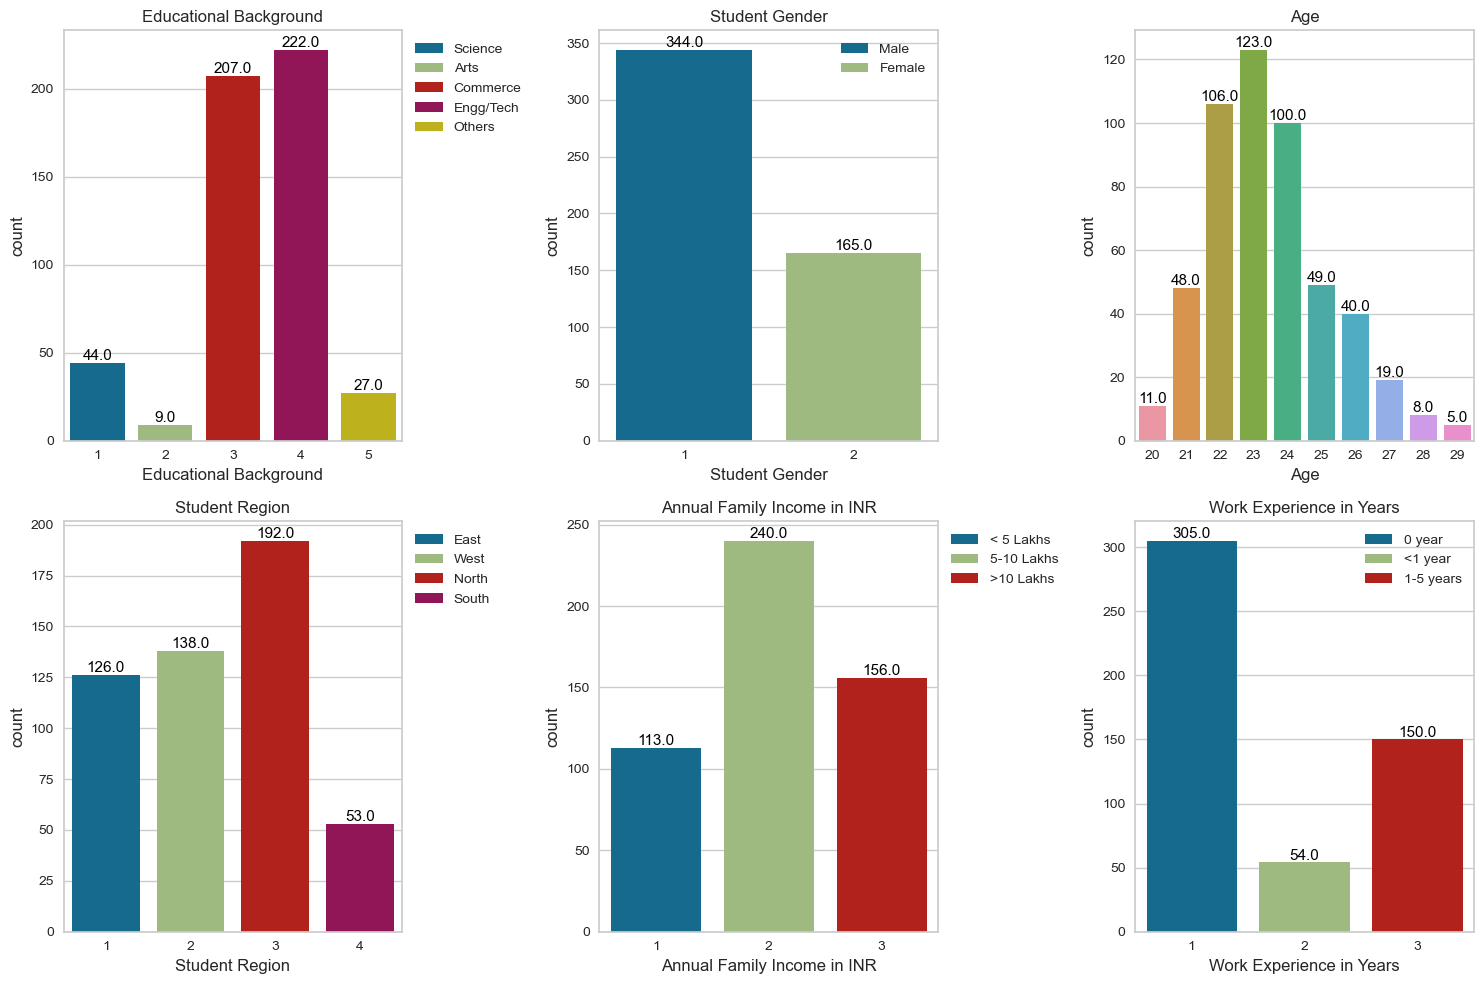

In [9]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.ravel()
sns.countplot(x = df3['Educational Background'], ax=ax[0], label=['Science','Arts','Commerce','Engg/Tech','Others'] )
sns.countplot(x = df3['Student Gender'], ax=ax[1], label = ['Male', 'Female'])
sns.countplot(x = df3['Age'], ax=ax[2])
sns.countplot(x = df3['Student Region'], ax=ax[3], label = ['East', 'West', 'North', 'South'])
sns.countplot(x = df3['Annual Family Income in INR'], ax=ax[4], label = ['< 5 Lakhs', '5-10 Lakhs', '>10 Lakhs'])
sns.countplot(x = df3['Work Experience in Years'], ax=ax[5], label = ['0 year', '<1 year', '1-5 years'])

ax[0].set_title("Educational Background")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("Student Gender")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("Age")
ax[3].set_title("Student Region")
ax[3].legend(bbox_to_anchor=(1,1))
ax[4].set_title("Annual Family Income in INR")
ax[4].legend(bbox_to_anchor=(1,1))
ax[5].set_title("Work Experience in Years")
ax[5].legend(bbox_to_anchor=(1,1))
for i in range(0,6):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

plt.show()

- Educational Background: This survey contains high number of responses from Engg/Tech followed by Commerce
- Student Gender: 67.5% of males & 32.5% of females have filled the form
- Age: Age distribution is right skewed, as we get low response from 28, 29 age group students, almost 64% of response are from 22-24 age group students
- Student Region: North region student has given high response followed by West, East, South.
- Annual Income: Almost 77% of students family income is more than 5 lakhs.
- Work Experience: Almost 40% os students have more than 0 years of experience

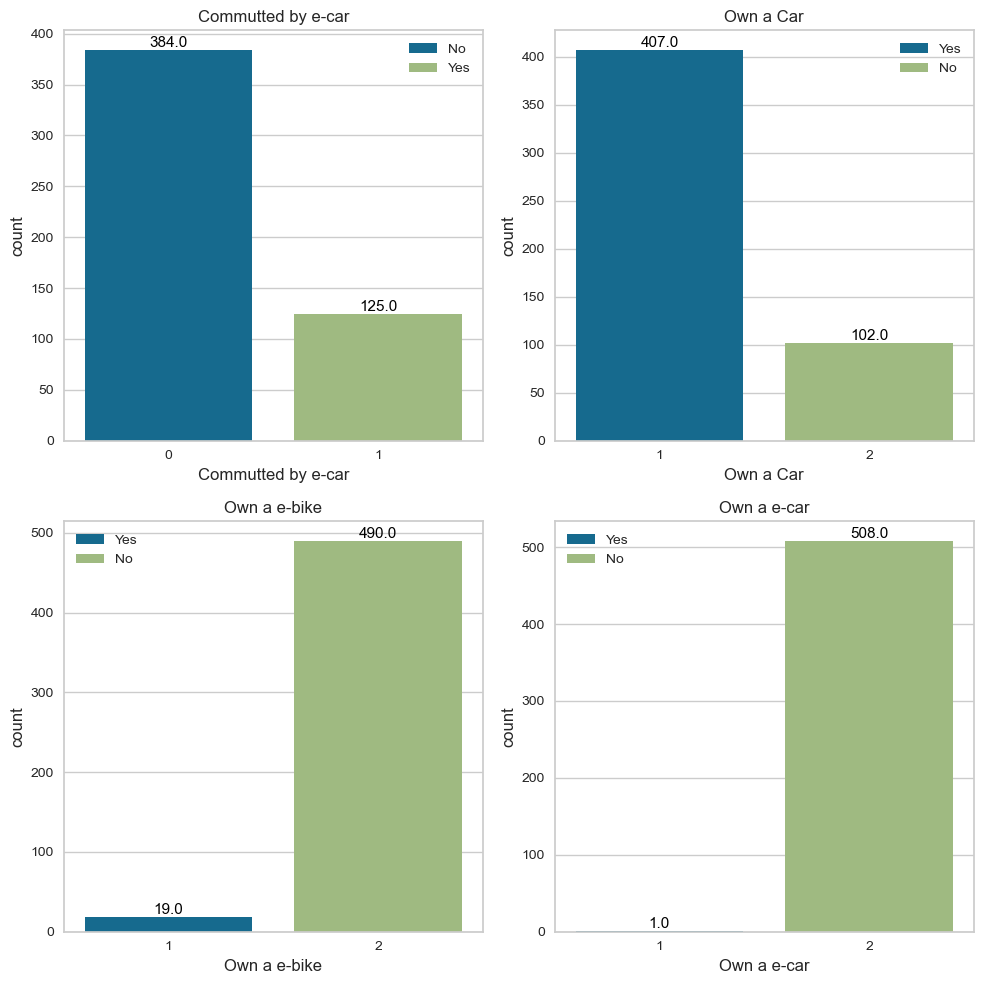

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.ravel()
sns.countplot(x = df3['Commutted by e-car'], ax=ax[0], label = ['No', 'Yes'])
sns.countplot(x = df3['Own a Car'], ax=ax[1], label = ['Yes', 'No'])
sns.countplot(x = df3['Own a e-bike'], ax=ax[2], label = ['Yes', 'No'])
sns.countplot(x = df3['Own a e-car'], ax=ax[3], label=['Yes', 'No'])

ax[0].set_title("Commutted by e-car")
ax[0].legend()
ax[1].set_title("Own a Car")
ax[1].legend()
ax[2].set_title("Own a e-bike")
ax[2].legend()
ax[3].set_title("Own a e-car")
ax[3].legend()
for i in range(0,4):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

- Commutted by e-car: only 24.5% of students use e-cars
- Own a car and e-car: Almost 80% own a car and only 1 student has e car
- Own a e-bike: Only 3.7% of students owns a ebike

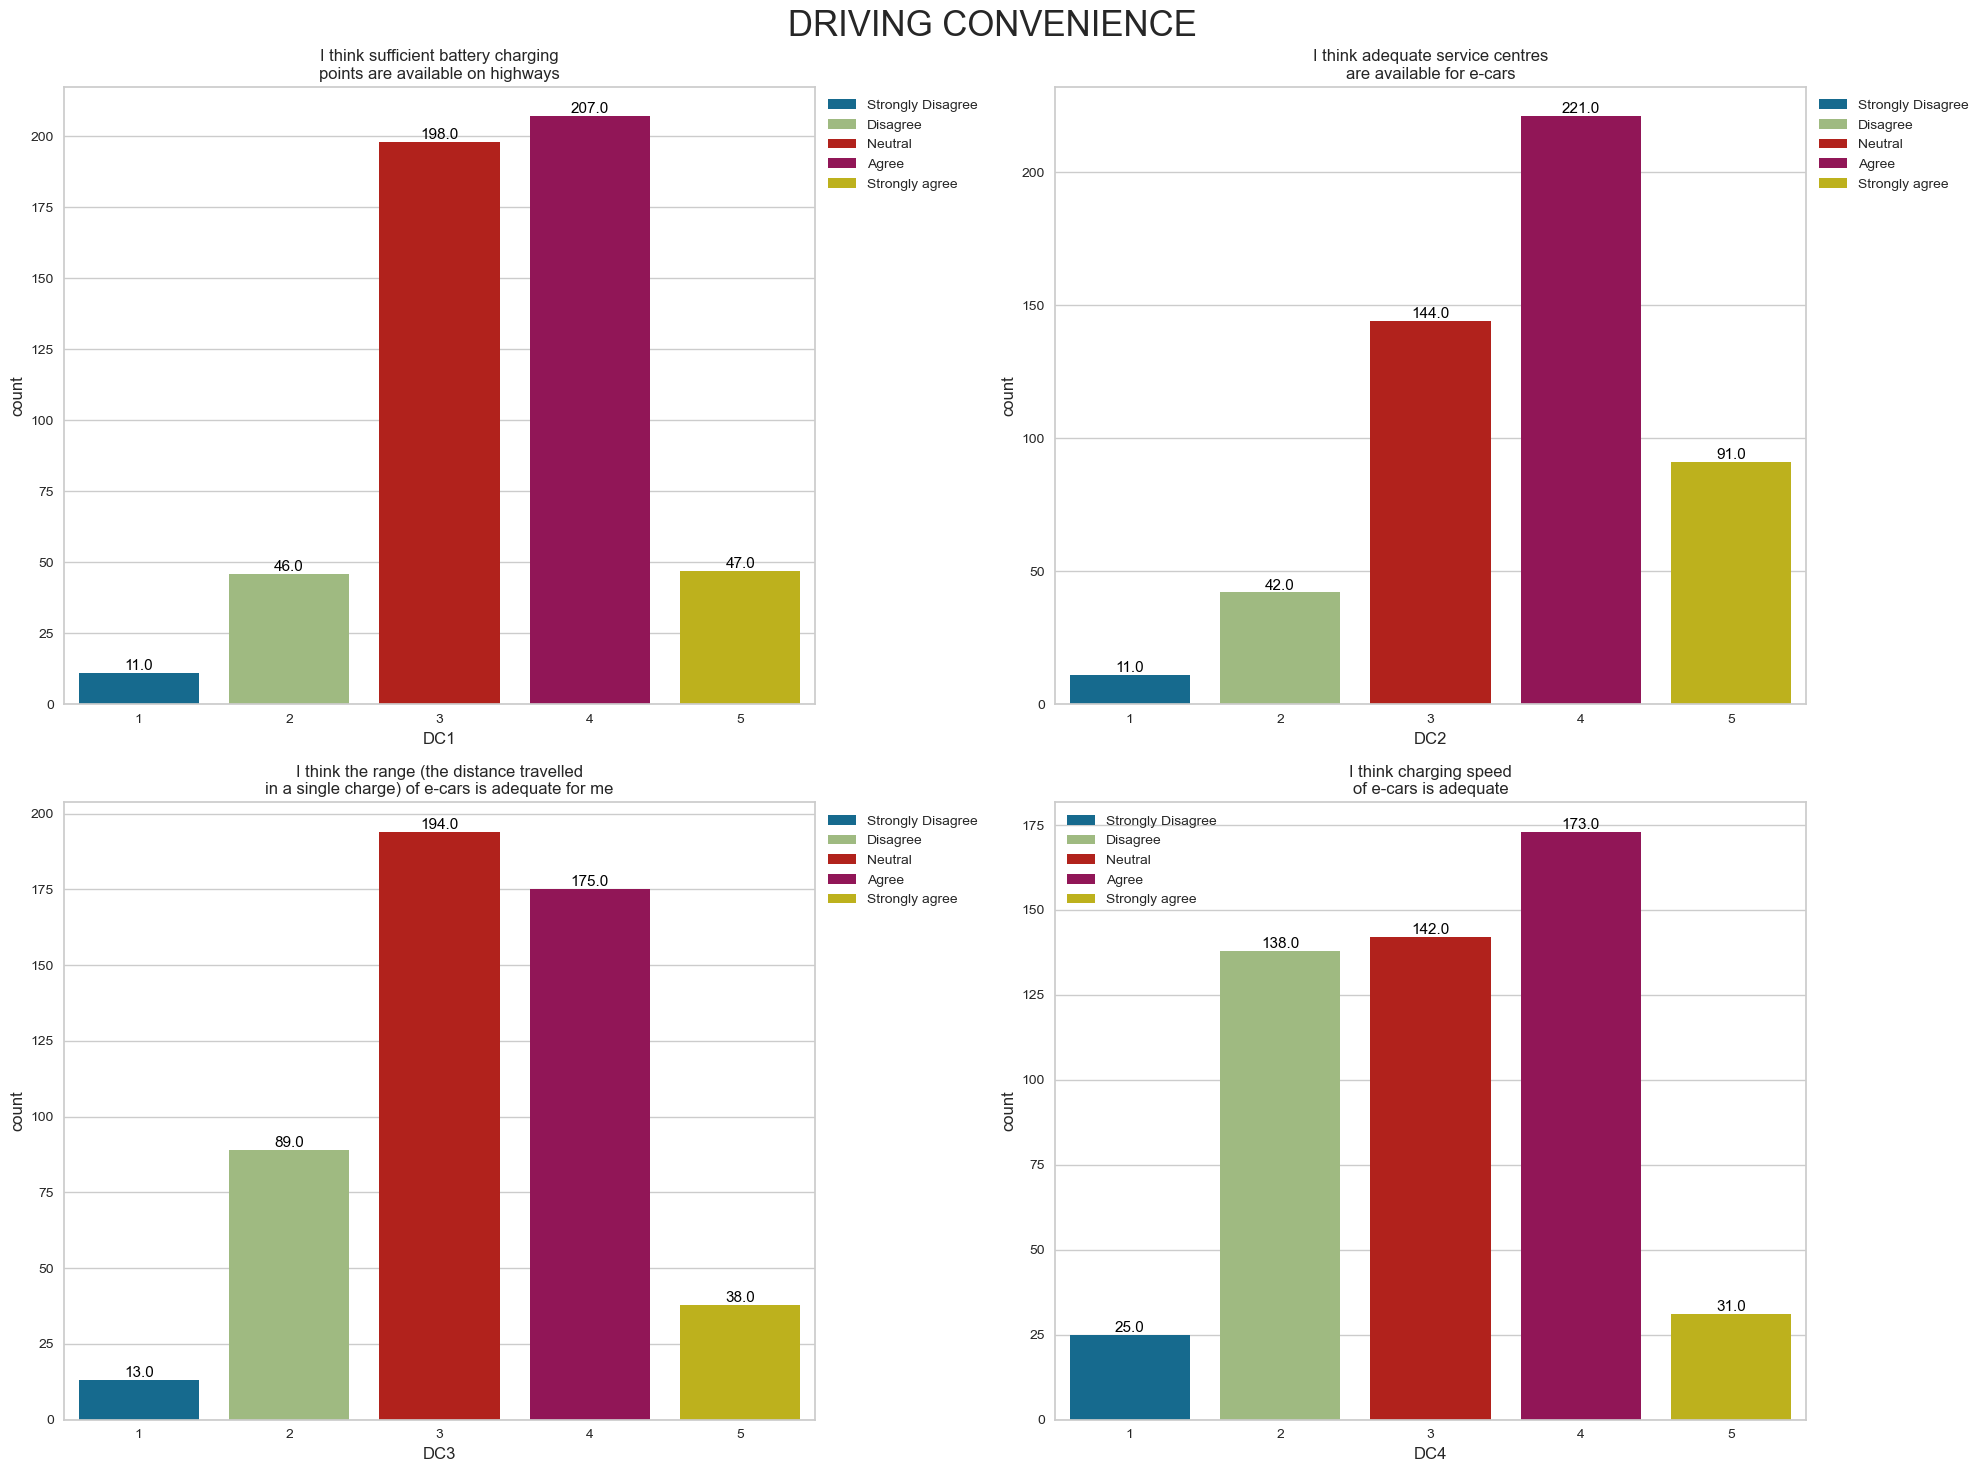

In [11]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
ax = ax.ravel()
sns.countplot(x = df3['DC1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['DC2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['DC3'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['DC4'], ax=ax[3], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
plt.suptitle("DRIVING CONVENIENCE", fontsize = 25)
ax[0].set_title("I think sufficient battery charging\npoints are available on highways")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("I think adequate service centres\nare available for e-cars")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I think the range (the distance travelled\nin a single charge) of e-cars is adequate for me")
ax[2].legend(bbox_to_anchor=(1,1))
ax[3].set_title("I think charging speed\nof e-cars is adequate")
ax[3].legend(bbox_to_anchor=(1,1))
plt.legend()
plt.tight_layout()
for i in range(0,4):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')



plt.show()

- I think sufficient battery charging points are available on highways: Almost 50 % of people have positive sentiment
- I think adequate service centres are available for e-cars: Almost 61% of people have positive sentiment
- I think the range (the distance travelled in a single charge) of e-cars is adequate for me: only 41 % of people are satisfied by range, & 38% of customers dont care about range i.e customer are less satisfied with range prviding by companies today.
- I think charging speed\nof e-cars is adequate: only 40% are satisfied by charging speed of e-cars
##### here we can conclude that customer are less satisfied with charging speed, Range of e-cars

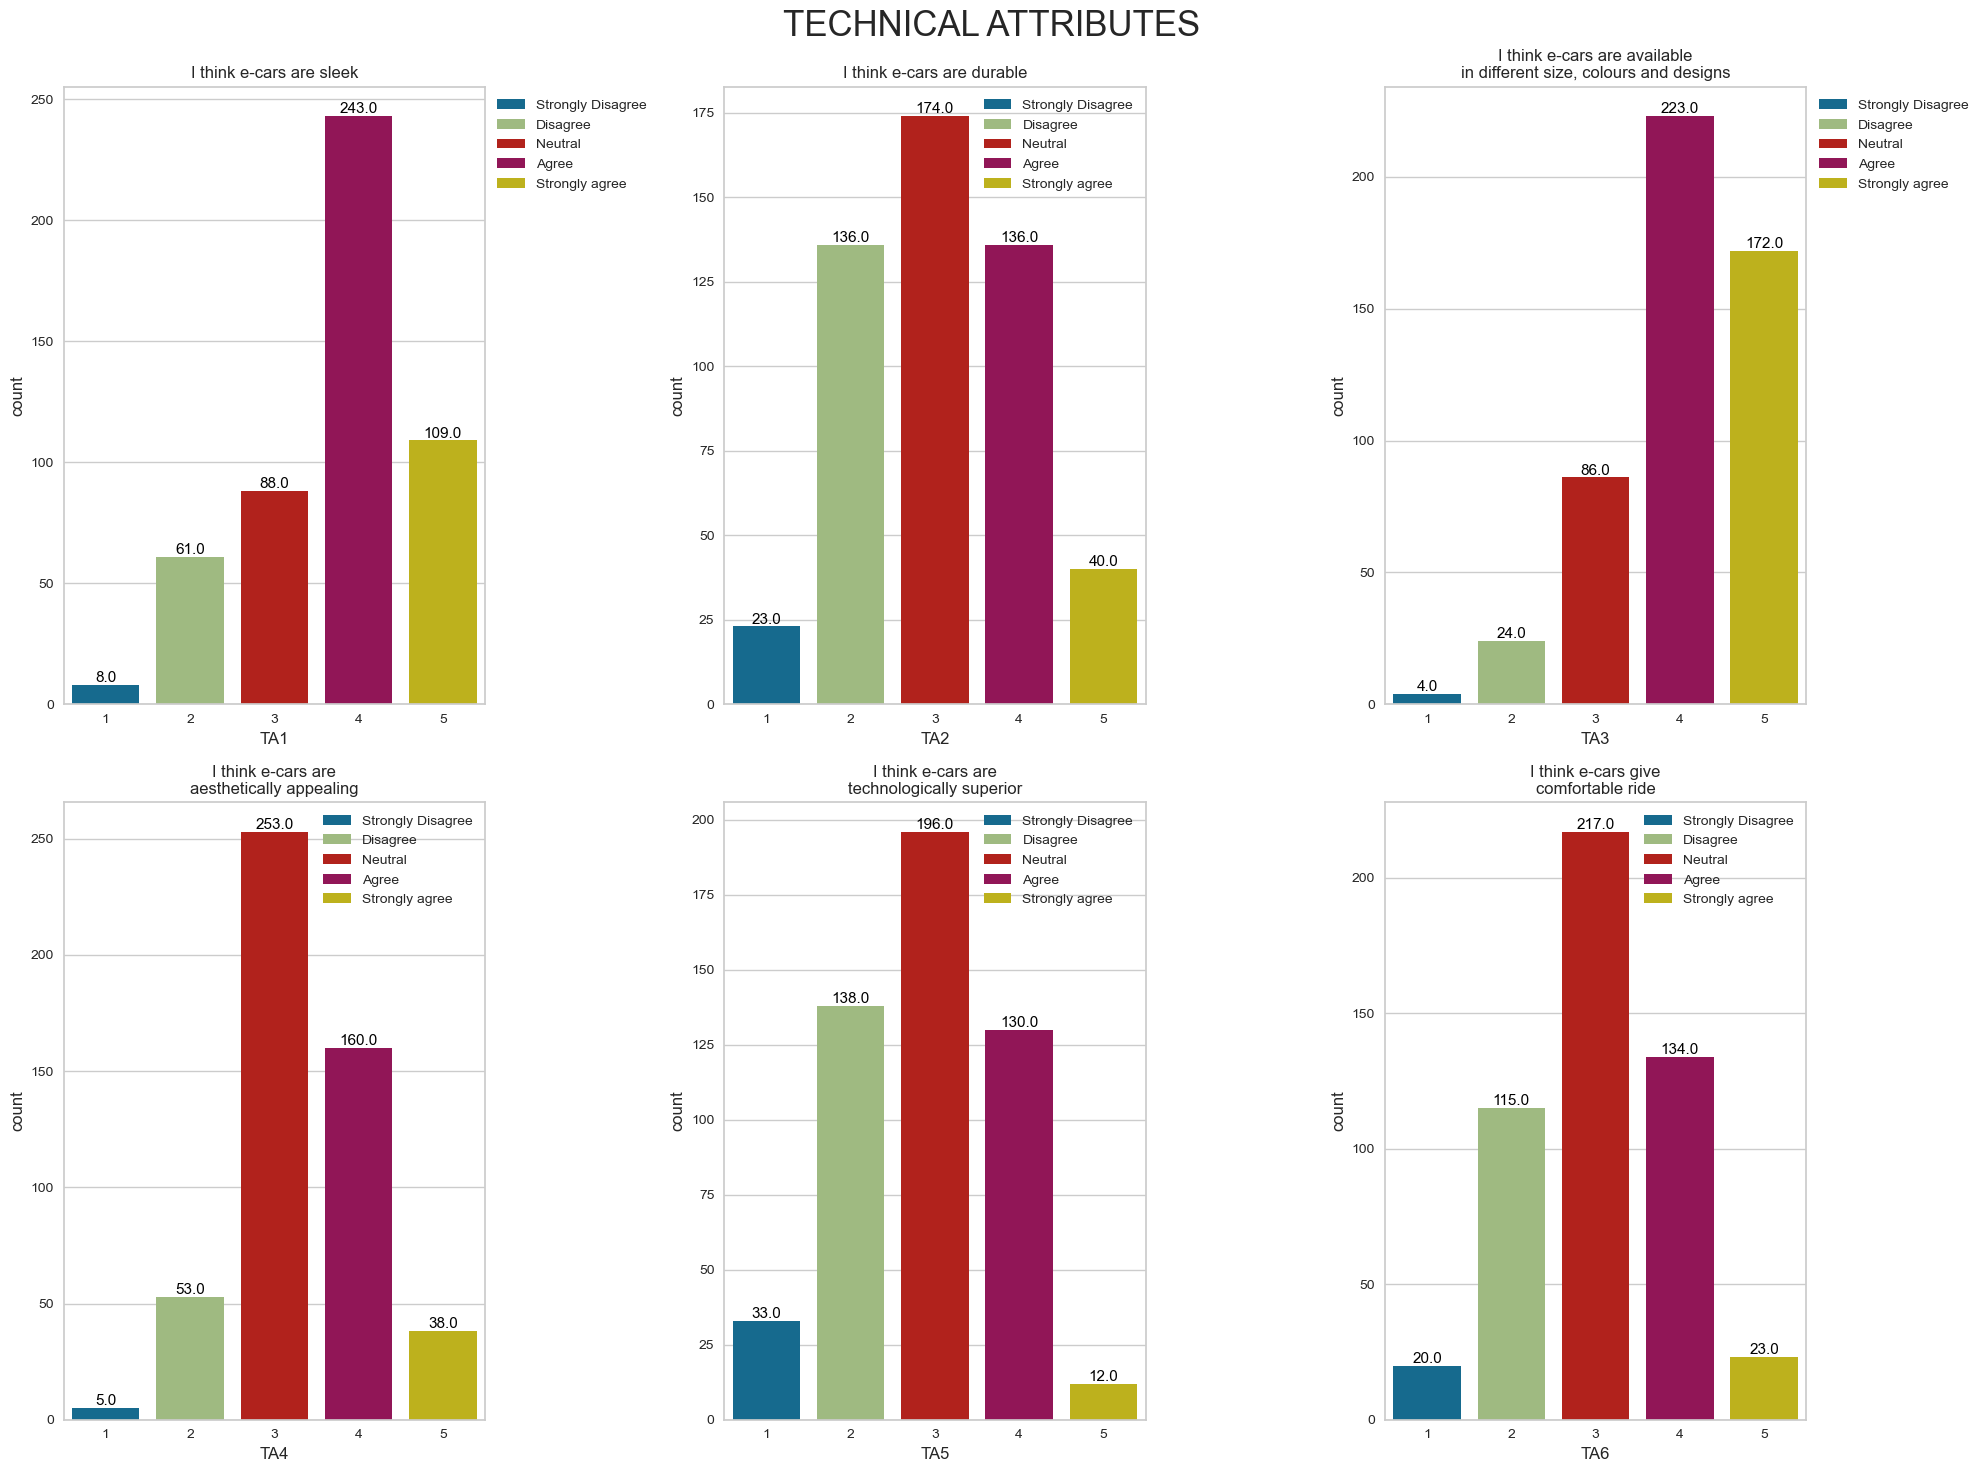

In [12]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
ax = ax.ravel()
sns.countplot(x = df3['TA1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['TA2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['TA3'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['TA4'], ax=ax[3], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['TA5'], ax=ax[4], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['TA6'], ax=ax[5], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
plt.suptitle("TECHNICAL ATTRIBUTES", fontsize = 25)
ax[0].set_title("I think e-cars are sleek")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("I think e-cars are durable")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I think e-cars are available\nin different size, colours and designs")
ax[2].legend(bbox_to_anchor=(1,1))
ax[3].set_title("I think e-cars are\naesthetically appealing")
ax[3].legend(bbox_to_anchor=(1,1))
ax[4].set_title("I think e-cars are\ntechnologically superior")
ax[4].legend(bbox_to_anchor=(1,1))
ax[5].set_title("I think e-cars give\ncomfortable ride")
ax[5].legend(bbox_to_anchor=(1,1))
plt.tight_layout()
for i in range(0,6):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')




plt.show()

- I think e-cars are sleek: 69% customers are satisfied
- I think e-cars are durable: only 34% customers are satisfied, 34% are neutral
- I think e-cars are available in different size, colours and designs: almost 80% customers are satisfied
- I think e-cars are aesthetically appealing: 38% customers are satisfied, 50% are neutral
- I think e-cars are technologically superior: 27% customers are satisfied, 38% are neutral
- I think e-cars give comfortable ride (TA6): 30% customers are satisfied, 42% are neutral 

##### here we can conclude that customer is not much satisfied with durability, comfortablity, and technologically superiority of e-cars.

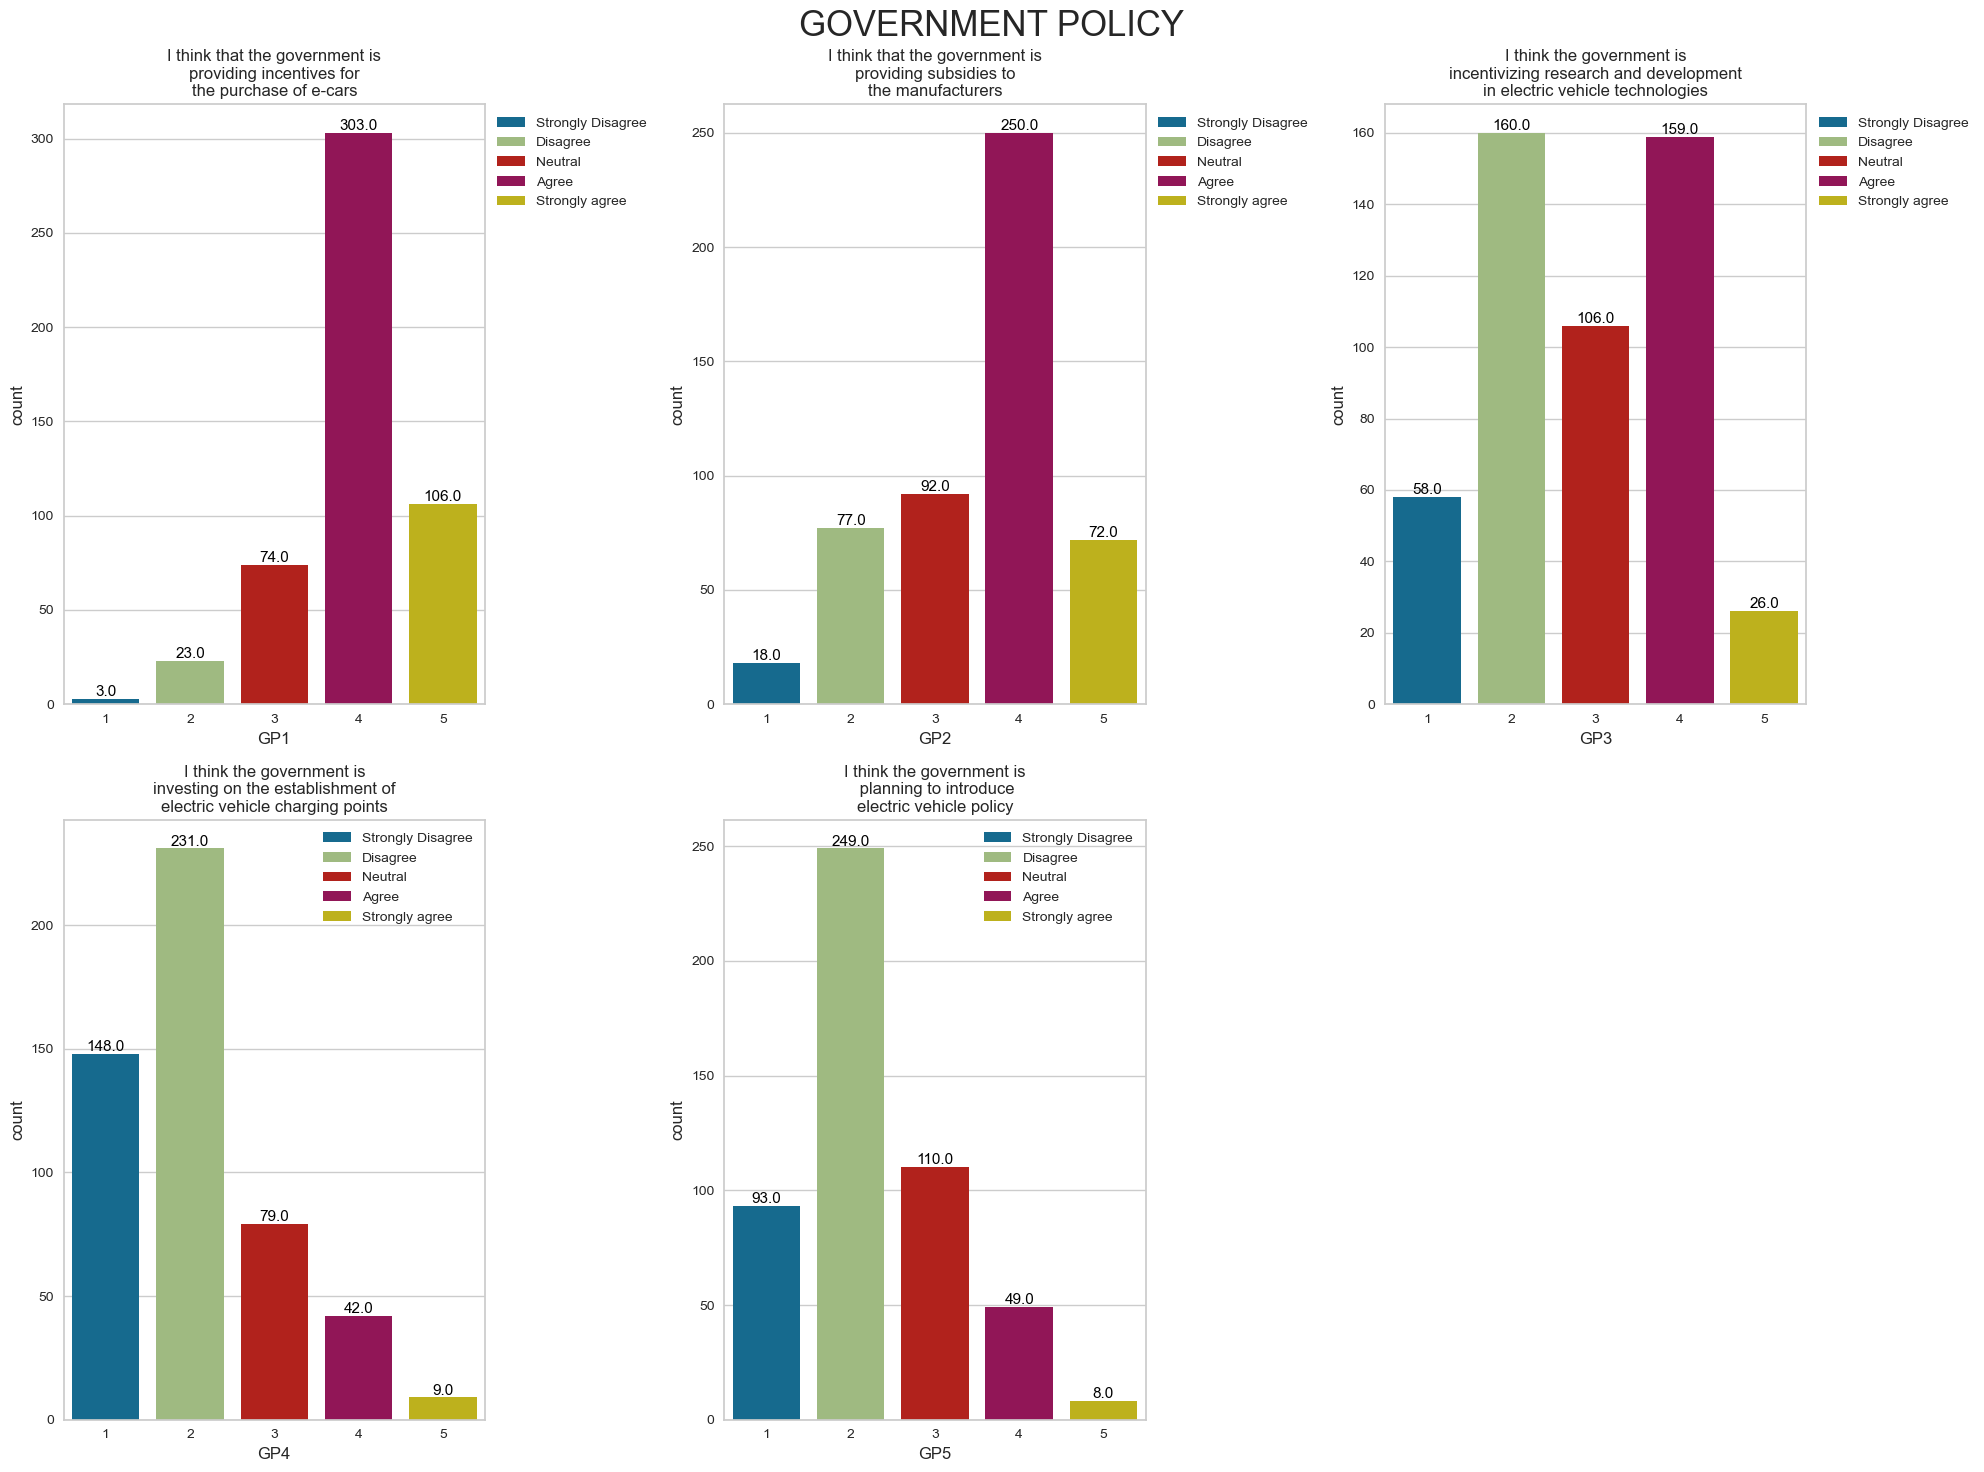

In [13]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
ax = ax.ravel()
sns.countplot(x = df3['GP1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['GP2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['GP3'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['GP4'], ax=ax[3], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['GP5'], ax=ax[4], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
ax[5].axis('off')
plt.suptitle("GOVERNMENT POLICY", fontsize = 25)

ax[0].set_title("I think that the government is\nproviding incentives for\nthe purchase of e-cars")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("I think that the government is\nproviding subsidies to\nthe manufacturers")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I think the government is\nincentivizing research and development\nin electric vehicle technologies")
ax[2].legend(bbox_to_anchor=(1,1))
ax[3].set_title("I think the government is\ninvesting on the establishment of\nelectric vehicle charging points")
ax[3].legend(bbox_to_anchor=(1,1))
ax[4].set_title("I think the government is\n planning to introduce\nelectric vehicle policy")
ax[4].legend(bbox_to_anchor=(1,1))
plt.tight_layout()
for i in range(0,5):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')



plt.show()

- I think that the government is providing incentives for the purchase of e-cars: 80% customers are satisfied
- I think that the government is providing subsidies to the manufacturers: 63% customer agrees
- I think the government is incentivizing research and development in electric vehicle technologies: only 36% agrees and almost 40 % doesn't agree
- I think the government is investing on the establishment of electric vehicle charging points: 74% customer disagrees
- I think the government is planning to introduce electric vehicle policy: 67% customer disagrees

##### here we can conclude that customers disagrees that government is planning for any ev policy and adding more charging points

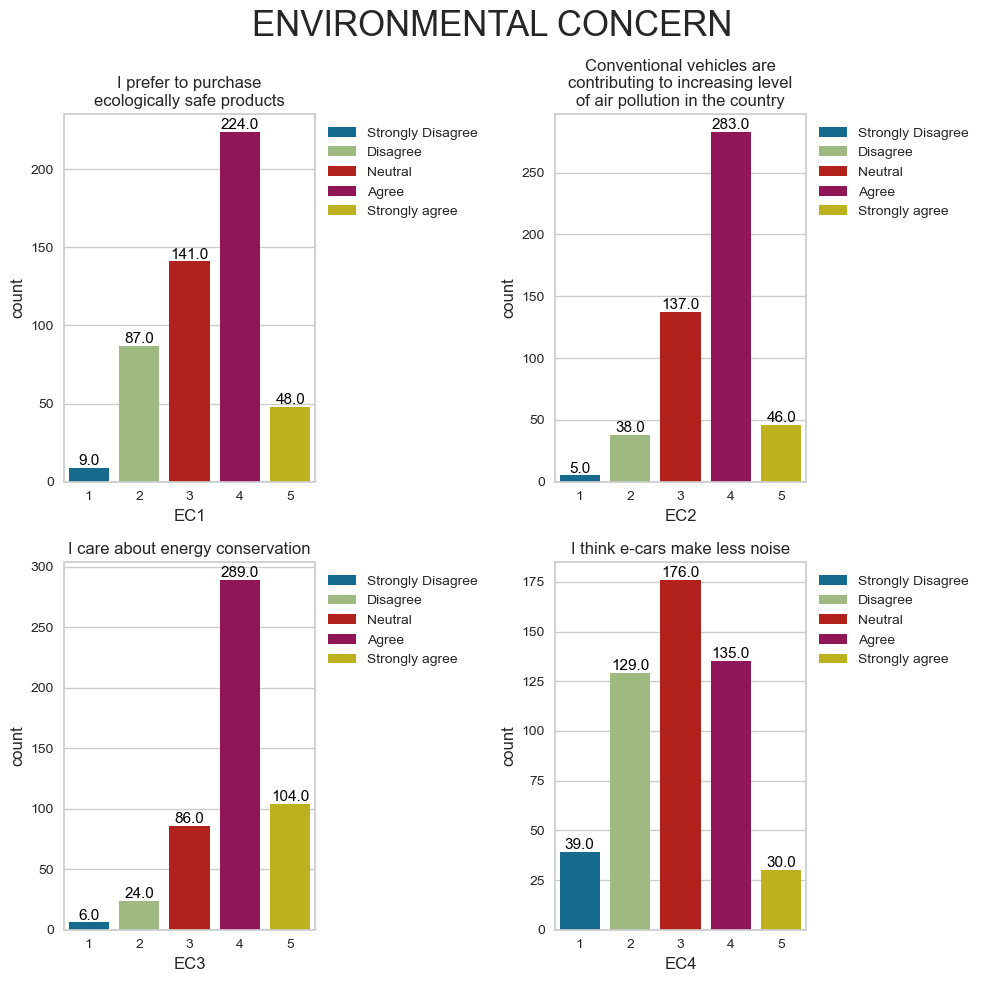

In [14]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.ravel()
sns.countplot(x = df3['EC1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['EC2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['EC3'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['EC4'], ax=ax[3], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
plt.suptitle("ENVIRONMENTAL CONCERN", fontsize = 25)

ax[0].set_title("I prefer to purchase\necologically safe products")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("Conventional vehicles are\ncontributing to increasing level\nof air pollution in the country")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I care about energy conservation")
ax[2].legend(bbox_to_anchor=(1,1))
ax[3].set_title("I think e-cars make less noise")
ax[3].legend(bbox_to_anchor=(1,1))
for i in range(0,4):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

- I prefer to purchase ecologically safe products: 53% of customers prefer enviornment friendly products
- Conventional vehicles are contributing to increasing level of air pollution in the country: 64% customer agrees
- I care about energy conservation: 77% agrees
- I think e-cars make less noise: only 32 % agrees, and 34% are neutral 

##### from here we can conclude that customers do care about enviornment & conservation of energy and disagrees that e cars make less noise.

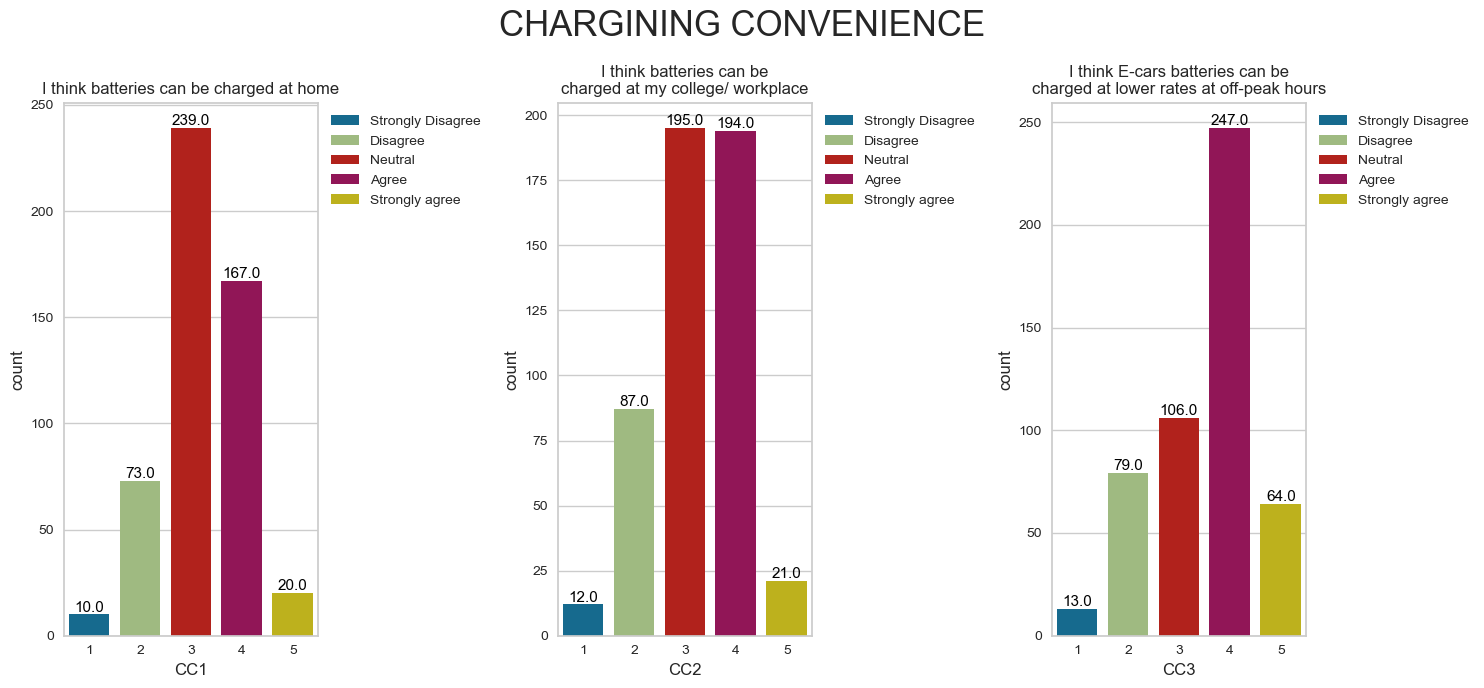

In [15]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax = ax.ravel()
sns.countplot(x = df3['CC1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['CC2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['CC3'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
plt.suptitle("CHARGINING CONVENIENCE", fontsize = 25)

ax[0].set_title("I think batteries can be charged at home")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("I think batteries can be\ncharged at my college/ workplace")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I think E-cars batteries can be\ncharged at lower rates at off-peak hours")
ax[2].legend(bbox_to_anchor=(1,1))
plt.tight_layout()
for i in range(0,3):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

- I think batteries can be charged at home: 36% agrees, 46 % neutral
- I think batteries can be charged at my college/ workplace: 42% agrees, 38% neutral
- I think E-cars batteries can be charged at lower rates at off-peak hours: 61% agrees
    
##### here we can conclude that we 30-50% of customers agrees that batteries can be charged at home, college, workplace

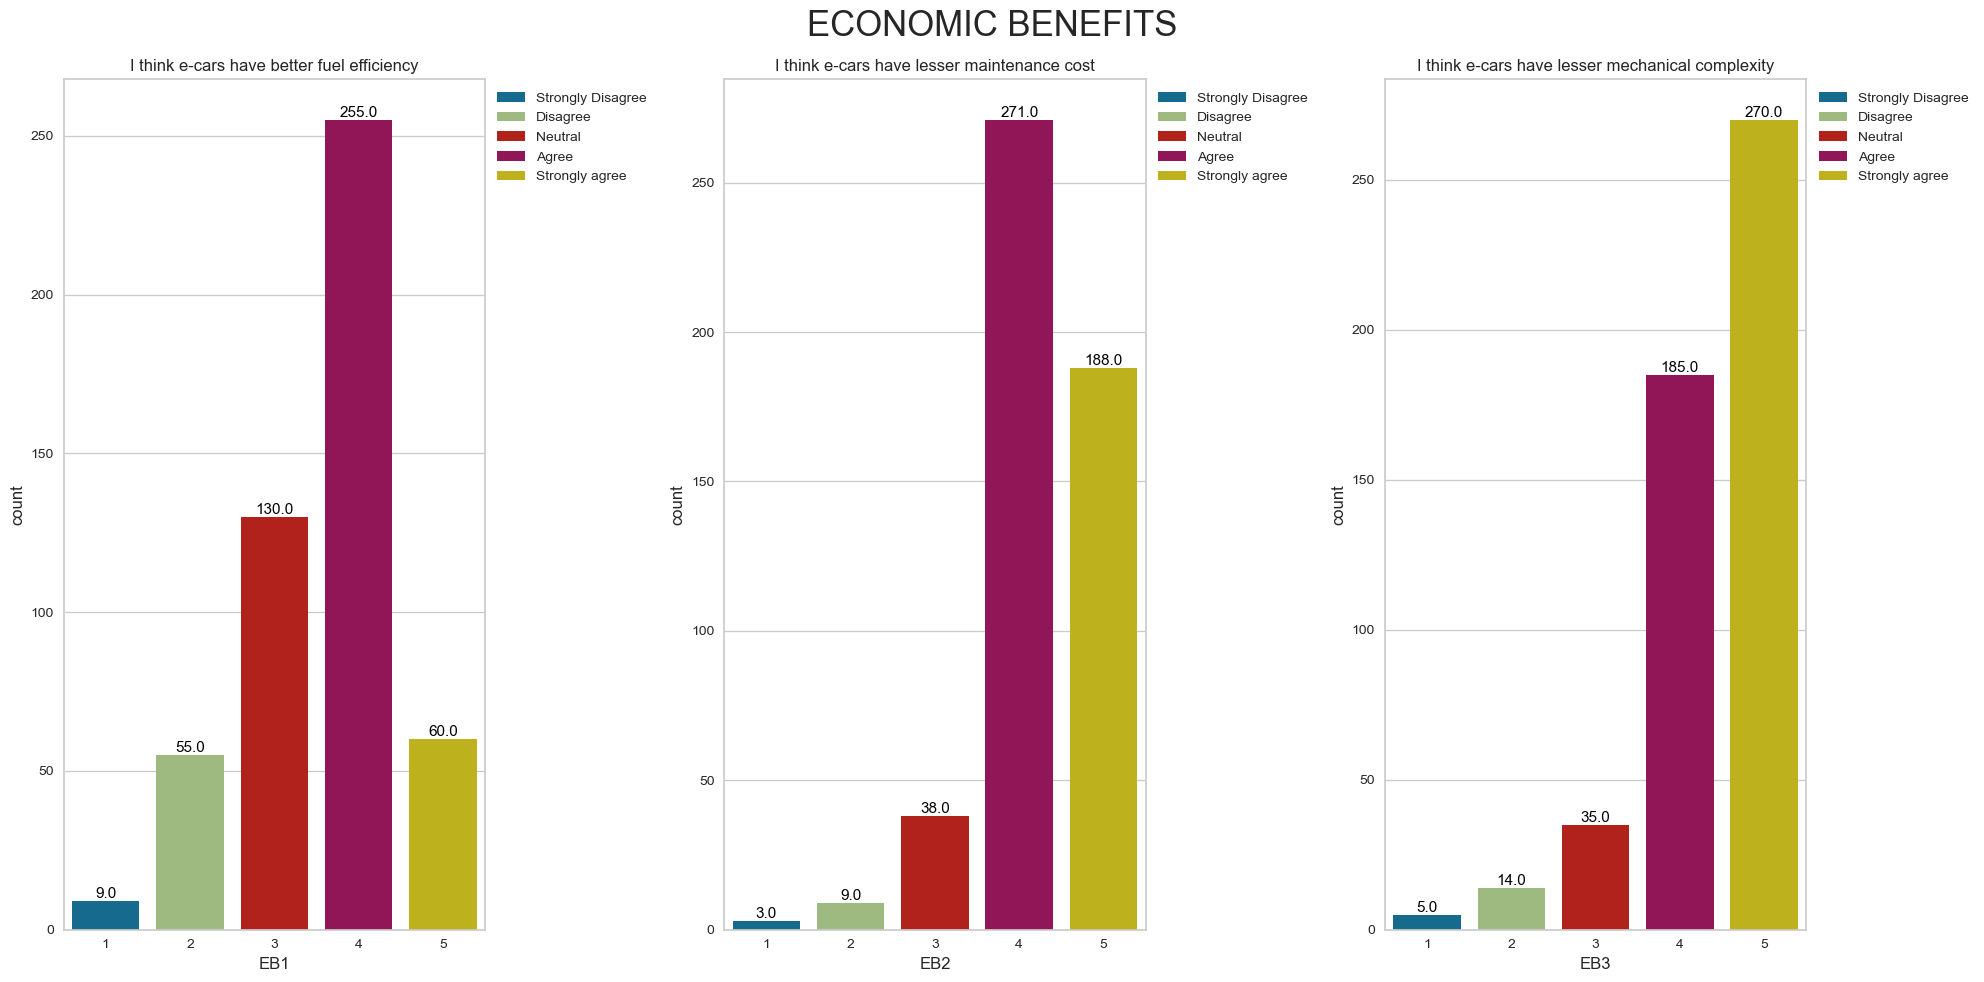

In [16]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax = ax.ravel()
sns.countplot(x = df3['EB1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['EB2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['EB3'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
plt.suptitle("ECONOMIC BENEFITS", fontsize = 25)

ax[0].set_title("I think e-cars have better fuel efficiency")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("I think e-cars have lesser maintenance cost")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I think e-cars have lesser mechanical complexity")
ax[2].legend(bbox_to_anchor=(1,1))
for i in range(0,3):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

- I think e-cars have better fuel efficiency: 61% agrees
- I think e-cars have lesser maintenance cost: 90% agrees
- I think e-cars have lesser mechanical complexity: 89% agrees
    
##### from here we can conclude that e-cars are fuel efficient, requires less maintainence cost, and less mechanical complexity 

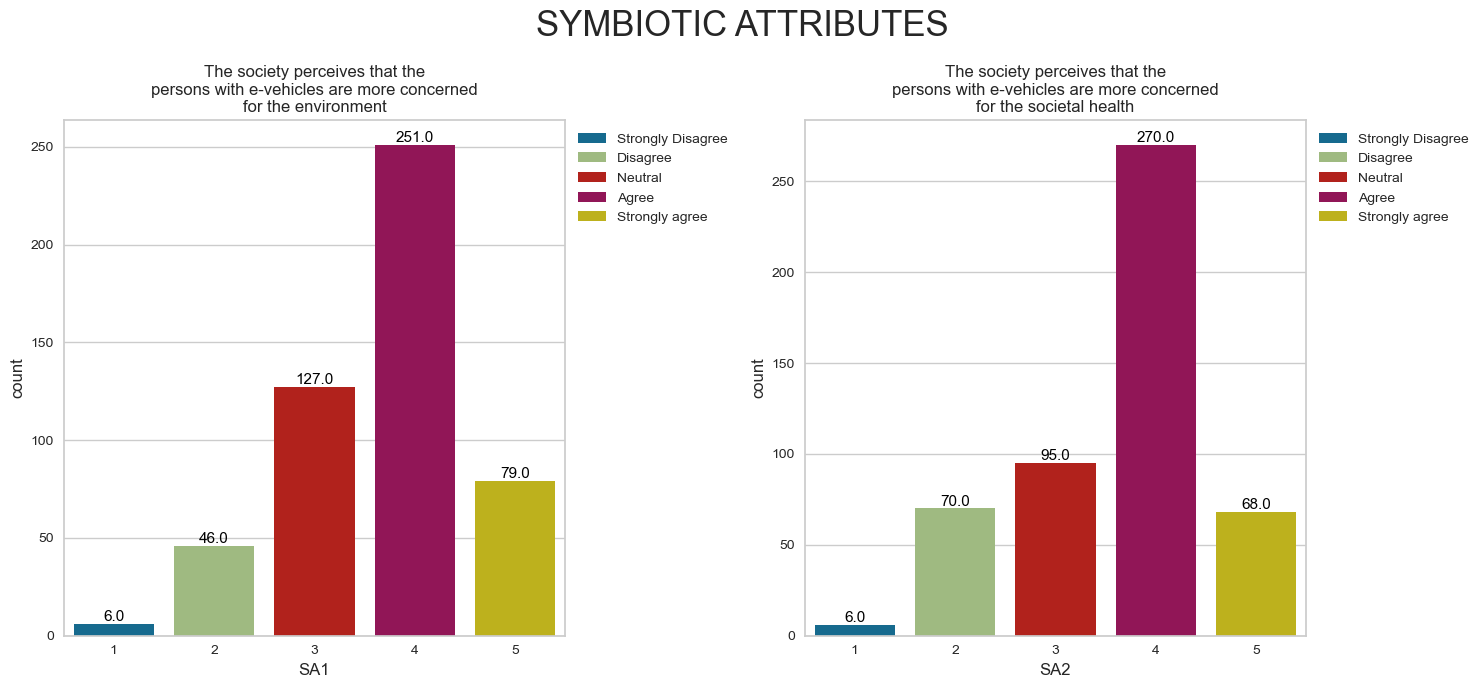

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax = ax.ravel()
sns.countplot(x = df3['SA1'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['SA2'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
plt.suptitle("SYMBIOTIC ATTRIBUTES", fontsize = 25)

ax[0].set_title("The society perceives that the\npersons with e-vehicles are more concerned\nfor the environment")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("The society perceives that the\npersons with e-vehicles are more concerned\nfor the societal health")
ax[1].legend(bbox_to_anchor=(1,1))
plt.tight_layout()
for i in range(0,2):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

- The society perceives that the persons with e-vehicles are more concerned for the environment: only 29% agrees to it, 32% are neutral
- The society perceives that the persons with e-vehicles are more concerned for the societal health: 64% agrees to it, 23 % are neutral 

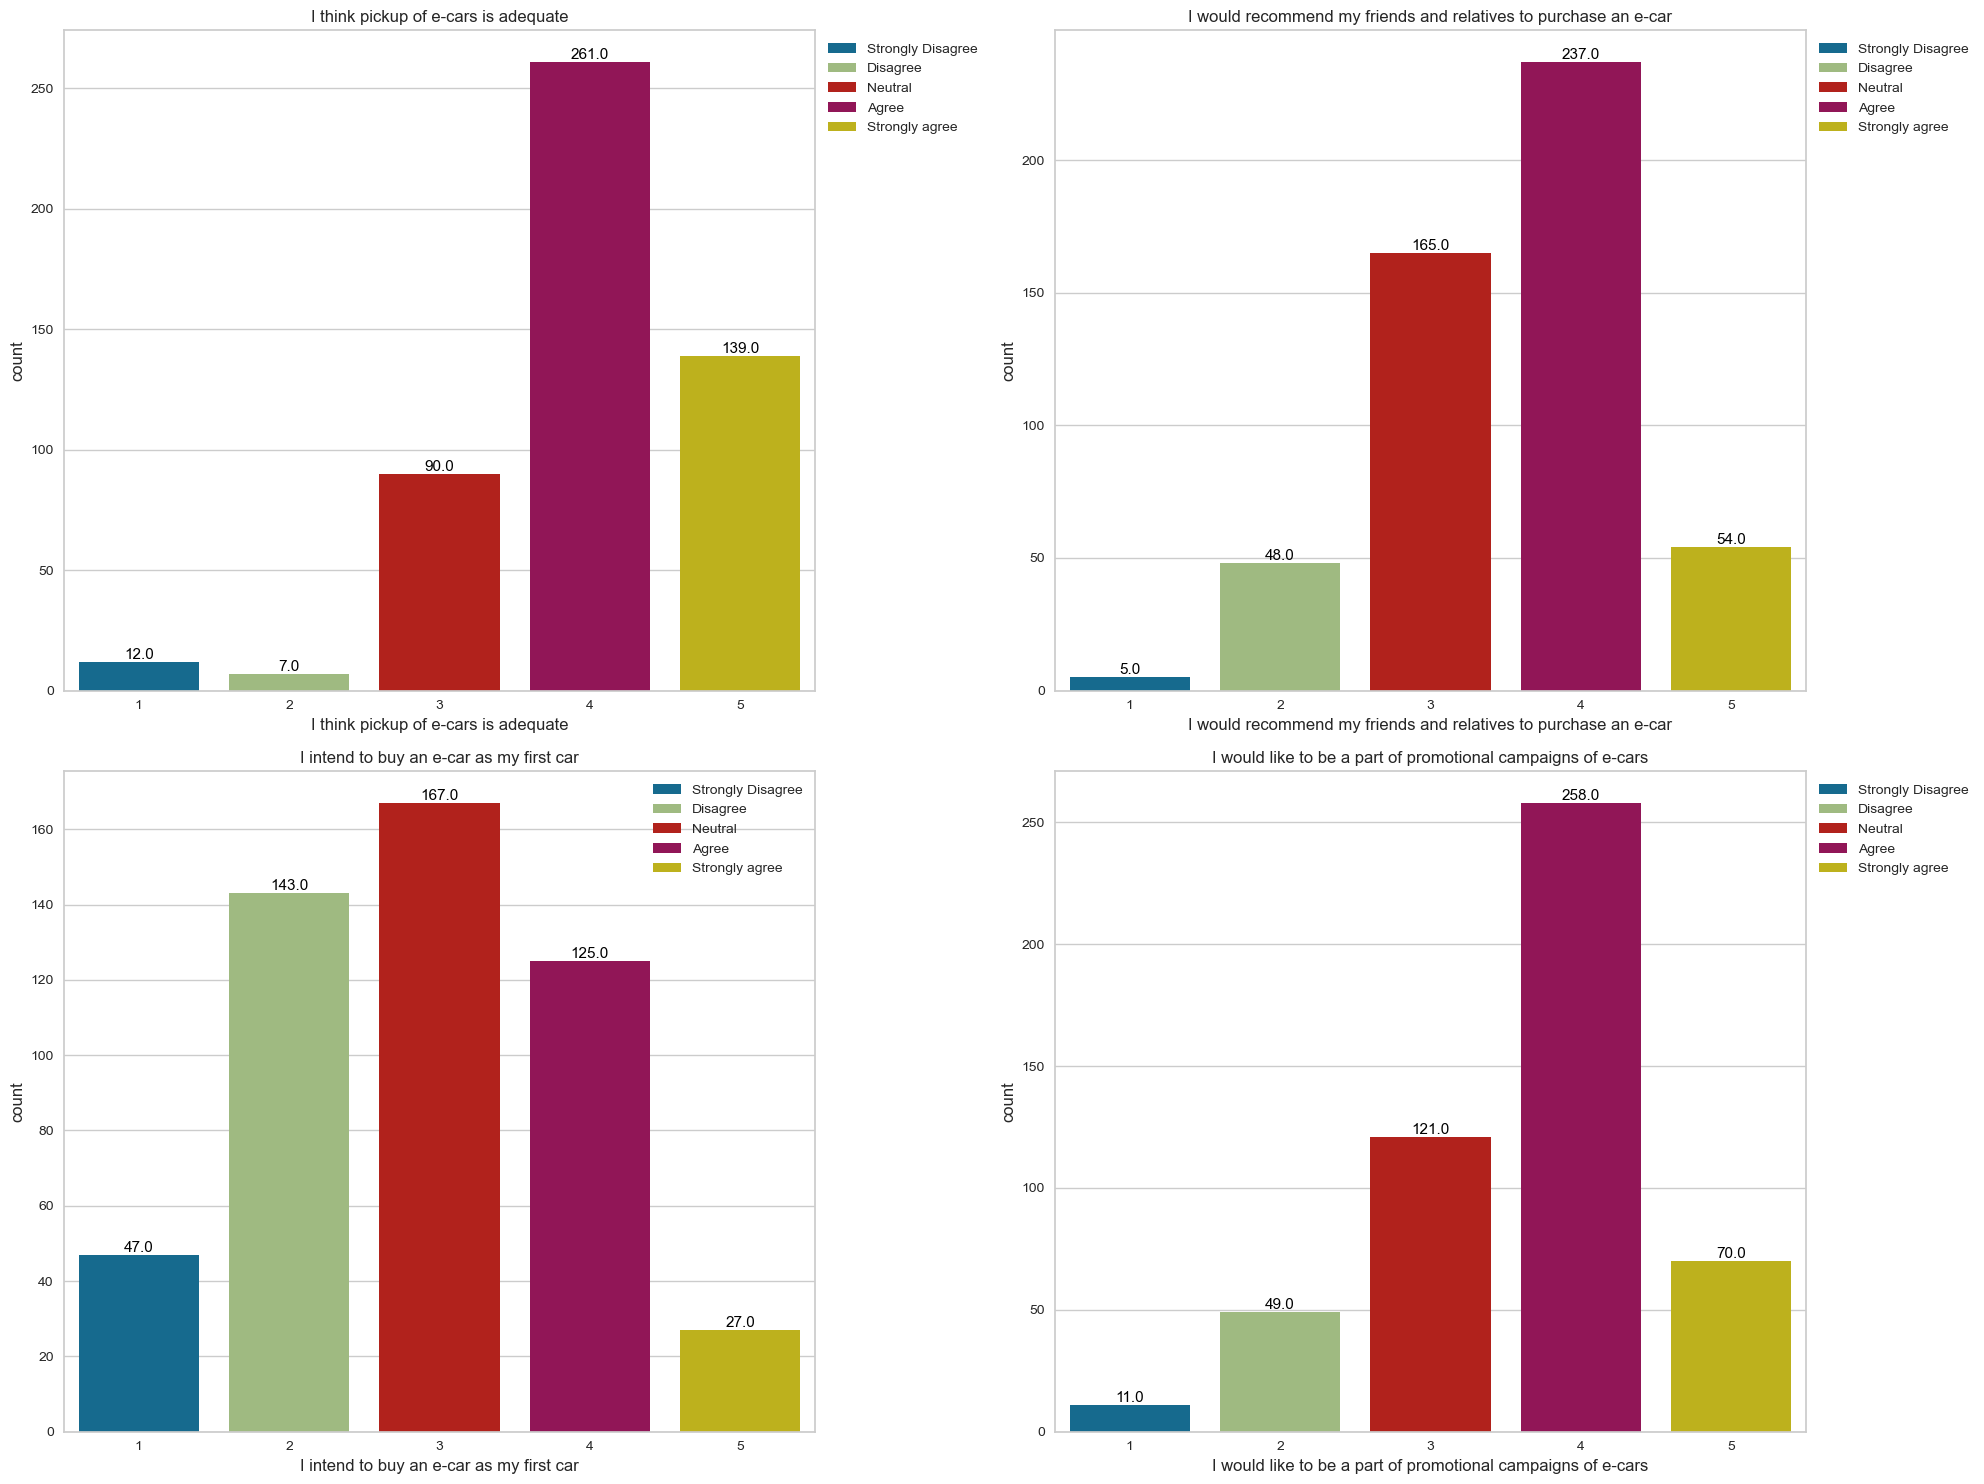

In [18]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
ax = ax.ravel()
sns.countplot(x = df3['I think pickup of e-cars is adequate'], ax=ax[0], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['I would recommend my friends and relatives to purchase an e-car'], ax=ax[1], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['I intend to buy an e-car as my first car'], ax=ax[2], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])
sns.countplot(x = df3['I would like to be a part of promotional campaigns of e-cars'], ax=ax[3], label = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'])

ax[0].set_title("I think pickup of e-cars is adequate")
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].set_title("I would recommend my friends and relatives to purchase an e-car")
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].set_title("I intend to buy an e-car as my first car")
ax[2].legend(bbox_to_anchor=(1,1))
ax[3].set_title("I would like to be a part of promotional campaigns of e-cars")
ax[3].legend(bbox_to_anchor=(1,1))
plt.tight_layout()
for i in range(0,4):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [19]:
df3_clust = df3.iloc[:,10:-4]
df3_clust.head()

,DC1,DC2,DC3,DC4,TA1,TA2,TA3,TA4,TA5,TA6,GP1,GP2,GP3,GP4,GP5,EC1,EC2,EC3,EC4,CC1,CC2,CC3,EB1,EB2,EB3,SA1,SA2
0,4,5,4,2,4,5,4,4,4,4,4,4,4,4,5,3,4,4,5,4,5,4,5,5,5,5,5
1,3,5,4,4,4,1,5,3,2,3,4,3,2,1,1,5,4,3,2,2,3,4,4,5,5,4,3
2,3,4,2,3,4,3,4,4,3,3,4,4,2,2,2,4,4,5,4,3,3,3,4,3,4,4,4
3,2,3,4,2,4,3,4,3,2,2,3,4,4,2,2,3,4,4,2,3,4,2,4,5,4,4,4
4,3,5,3,2,3,5,5,4,4,4,4,3,3,1,1,1,3,3,4,3,4,4,4,5,5,3,3


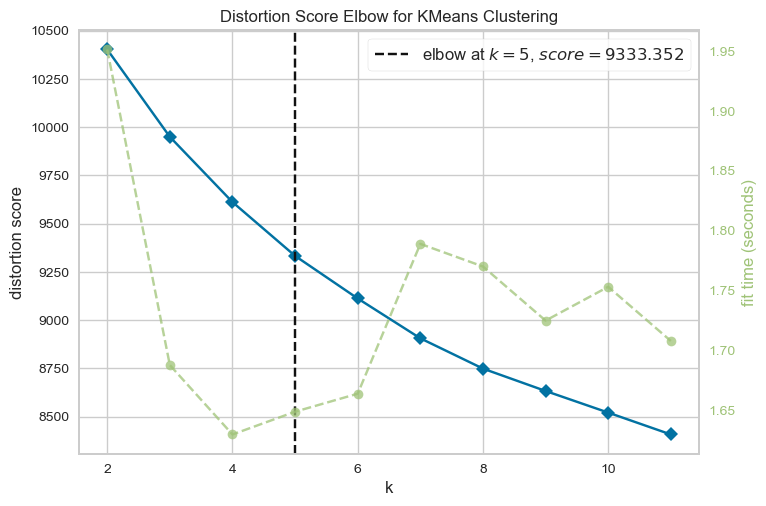

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
np.random.seed(1234)
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,12)).fit(df3_clust)
visualizer.show()

In [21]:
np.random.seed(1234)
model_clust = KMeans(n_clusters=5, n_init=10)
model_clust = model_clust.fit(df3_clust)
df3['clusters'] = model_clust.labels_

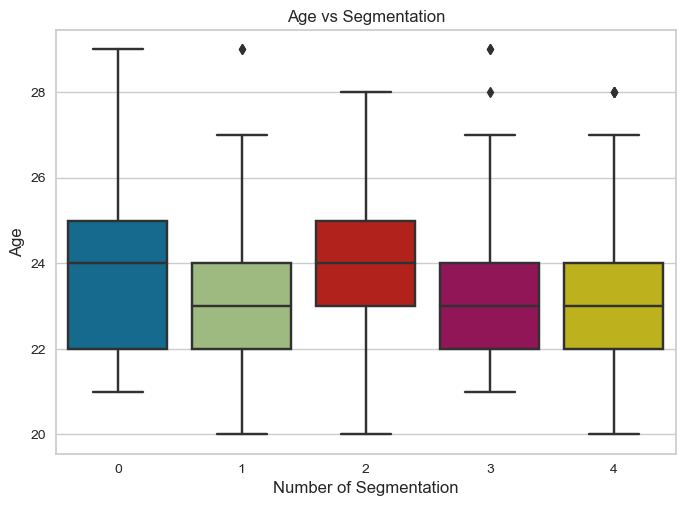

In [22]:
sns.boxplot(x = df3['clusters'],y = df3['Age'])
plt.xlabel("Number of Segmentation")
plt.title("Age vs Segmentation")
plt.ylabel("Age")
plt.show()

- The above boxplot concludes that:
- segment 1, Segment 3 &  has segmented customer who are 23 years and
- Segment 0 & 2 has segmented customer who are 24 years
  1. Segment 0 ranges form [21,29]
  2. Segment 1 ranges from [20, 27]
  3. Segment 2 ranges from [20,28]
  4. Segment 3 ranges from [21, 27]
  5. Segment 4 ranges from [20,27]

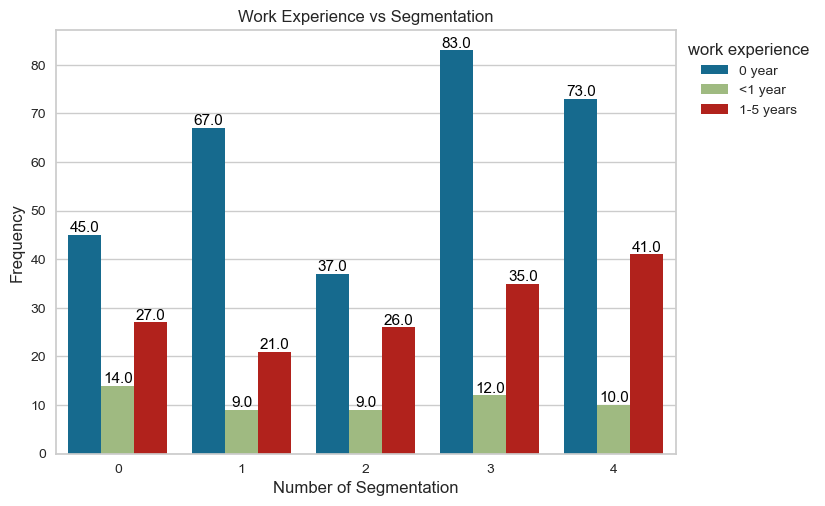

In [23]:
sns.countplot(x = df3['clusters'], hue = df3['Work Experience in Years'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(labels = ['0 year', '<1 year', '1-5 years'], title='work experience', bbox_to_anchor = (1,1))
plt.xlabel("Number of Segmentation")
plt.ylabel("Frequency")
plt.title("Work Experience vs Segmentation")
plt.show()


- Customer with 1-5 years of experience are clustered more into 4th segment
- Customer with 0 years of experience are clustered into 3rd segment heavily
- Customer with <1 years of experience is almost stable through each segment

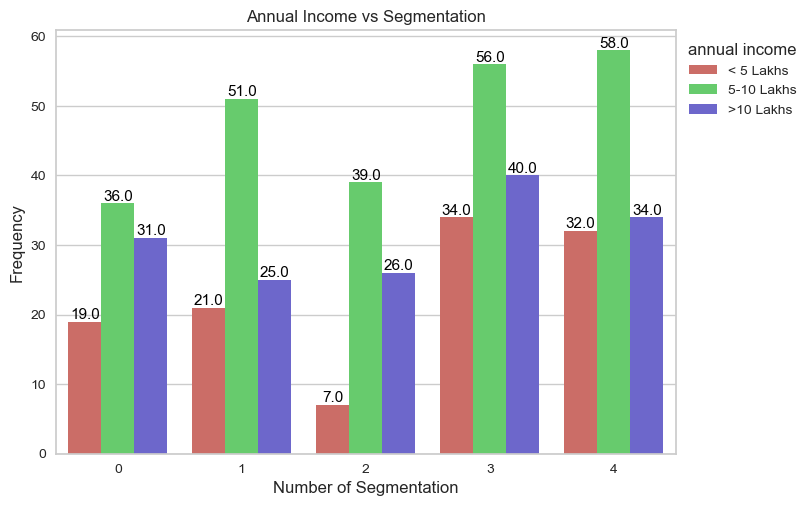

In [24]:
sns.countplot(x = df3['clusters'], hue = df3['Annual Family Income in INR'], palette='hls')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(labels = ['< 5 Lakhs', '5-10 Lakhs', '>10 Lakhs'], title='annual income', bbox_to_anchor = (1,1))
plt.xlabel("Number of Segmentation")
plt.ylabel("Frequency")
plt.title("Annual Income vs Segmentation")
plt.show()


- Customer with 5-10L annual family income are segmented into segment 3 & 4.
- Customer with >10L annual income are segmented into segemnt 3
- Customer with <5L annual income are segmented more into segment 3 & 4


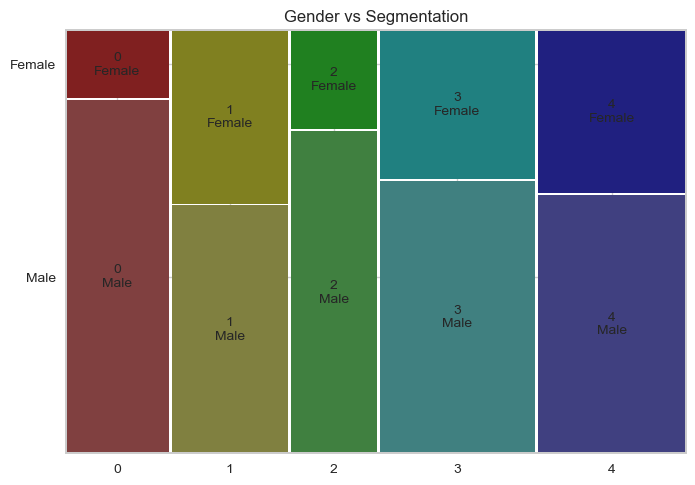

In [25]:

df3_gen = pd.crosstab(index = df3['clusters'], columns = df3['Student Gender'])
df3_gen = df3_gen.rename(columns={1:'Male', 2:'Female'})
mosaic(df3_gen.stack(), title = "Gender vs Segmentation")
plt.show()

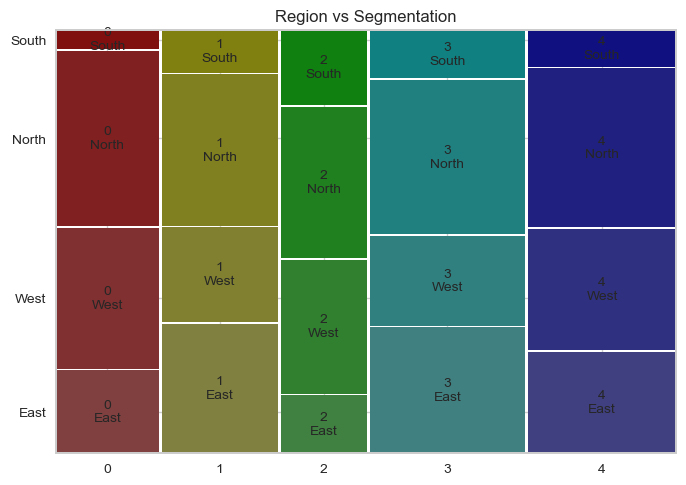

In [26]:
df3_reg = pd.crosstab(index = df3['clusters'], columns = df3['Student Region'])
df3_reg = df3_reg.rename(columns={1:"East", 2:'West', 3:'North', 4:'South'})
mosaic(df3_reg.stack(), title = "Region vs Segmentation")
plt.show()

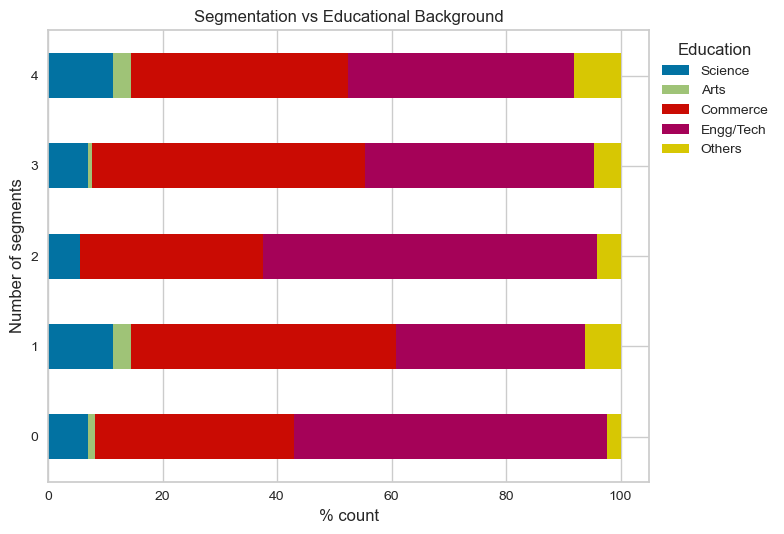

In [27]:
df3_edu = df3.groupby(['clusters'])['Educational Background'].value_counts(normalize = True)*100
df3_edu.to_frame()
df3_edu = df3_edu.to_frame()
df3_edu.columns = ['values']
df3_edu['values'] = df3_edu['values'].round(2)
pivot_edu = pd.pivot_table(data = df3_edu,values='values', index='clusters', columns='Educational Background')
ax = pivot_edu.plot(kind='barh', stacked = True)
plt.legend(bbox_to_anchor = (1,1), labels =['Science','Arts', 'Commerce', 'Engg/Tech', 'Others'], title='Education')
plt.ylabel('Number of segments')
plt.title("Segmentation vs Educational Background")
plt.xlabel("% count")
plt.tight_layout()
plt.show()

- Segment 2 and 0 has segmented more no. of Engg/Tech students
- Segment 3 & 4 has almost similar no. of students for Engg/Tech & Commerce

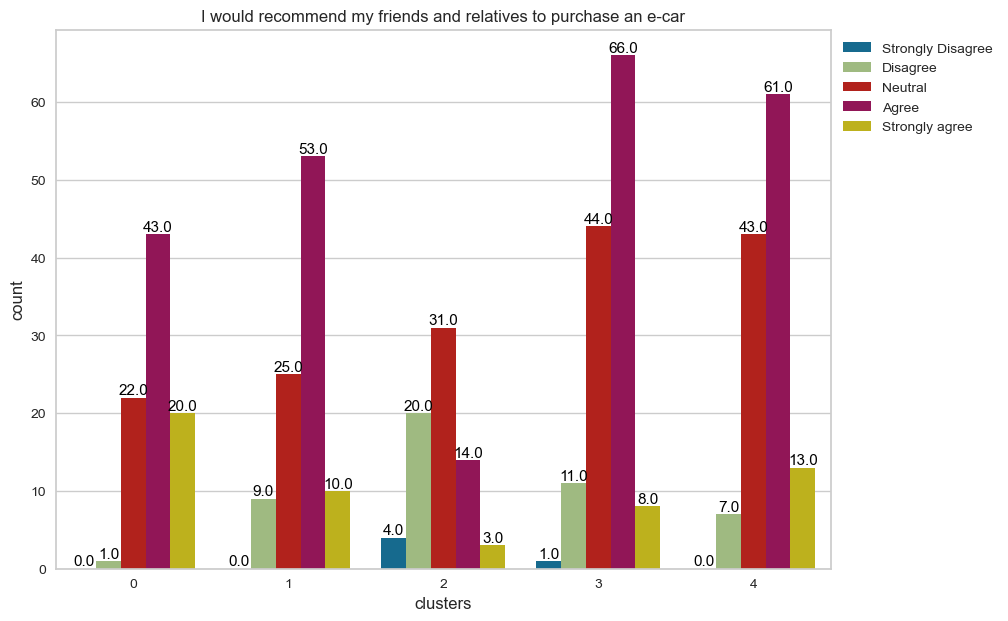

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x = df3['clusters'], hue= df3['I would recommend my friends and relatives to purchase an e-car'])
plt.legend(labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'], bbox_to_anchor = (1,1))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("I would recommend my friends and relatives to purchase an e-car")
plt.show()

- Segment 3 & 4 customers would recommend family/friend for EV
- Segment 2 customers would not recommend family/friend for EV compared to other segments

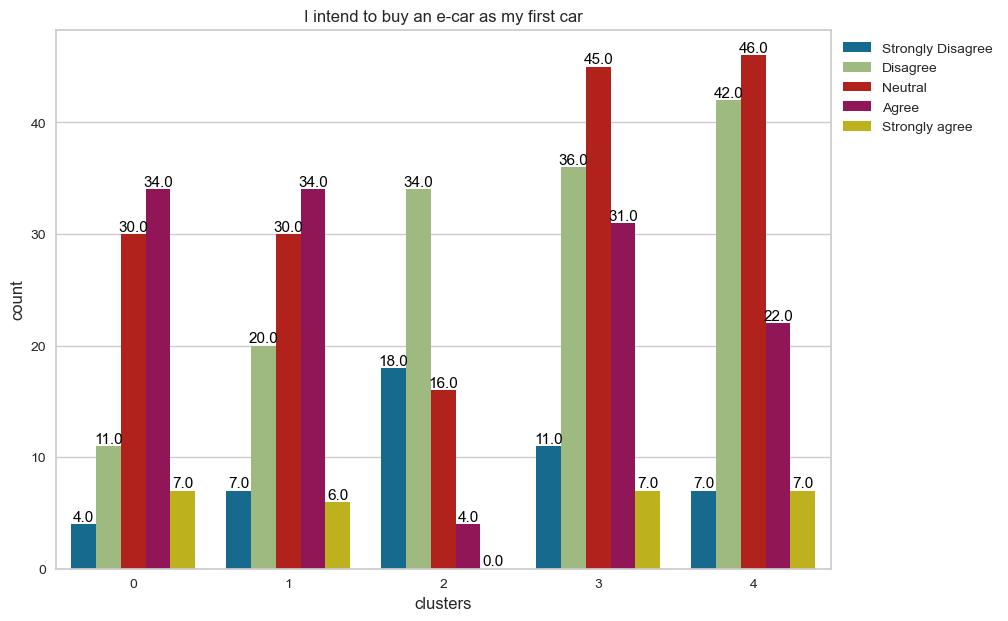

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x = df3['clusters'], hue= df3['I intend to buy an e-car as my first car'])
plt.legend(labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'], bbox_to_anchor = (1,1))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("I intend to buy an e-car as my first car")
plt.show()

- Segment 3 & 4 customers are more neutral towards purchasing ev as there first car
- Segment 1 & 0 customers are more shifted towards purchasing ev as their first car

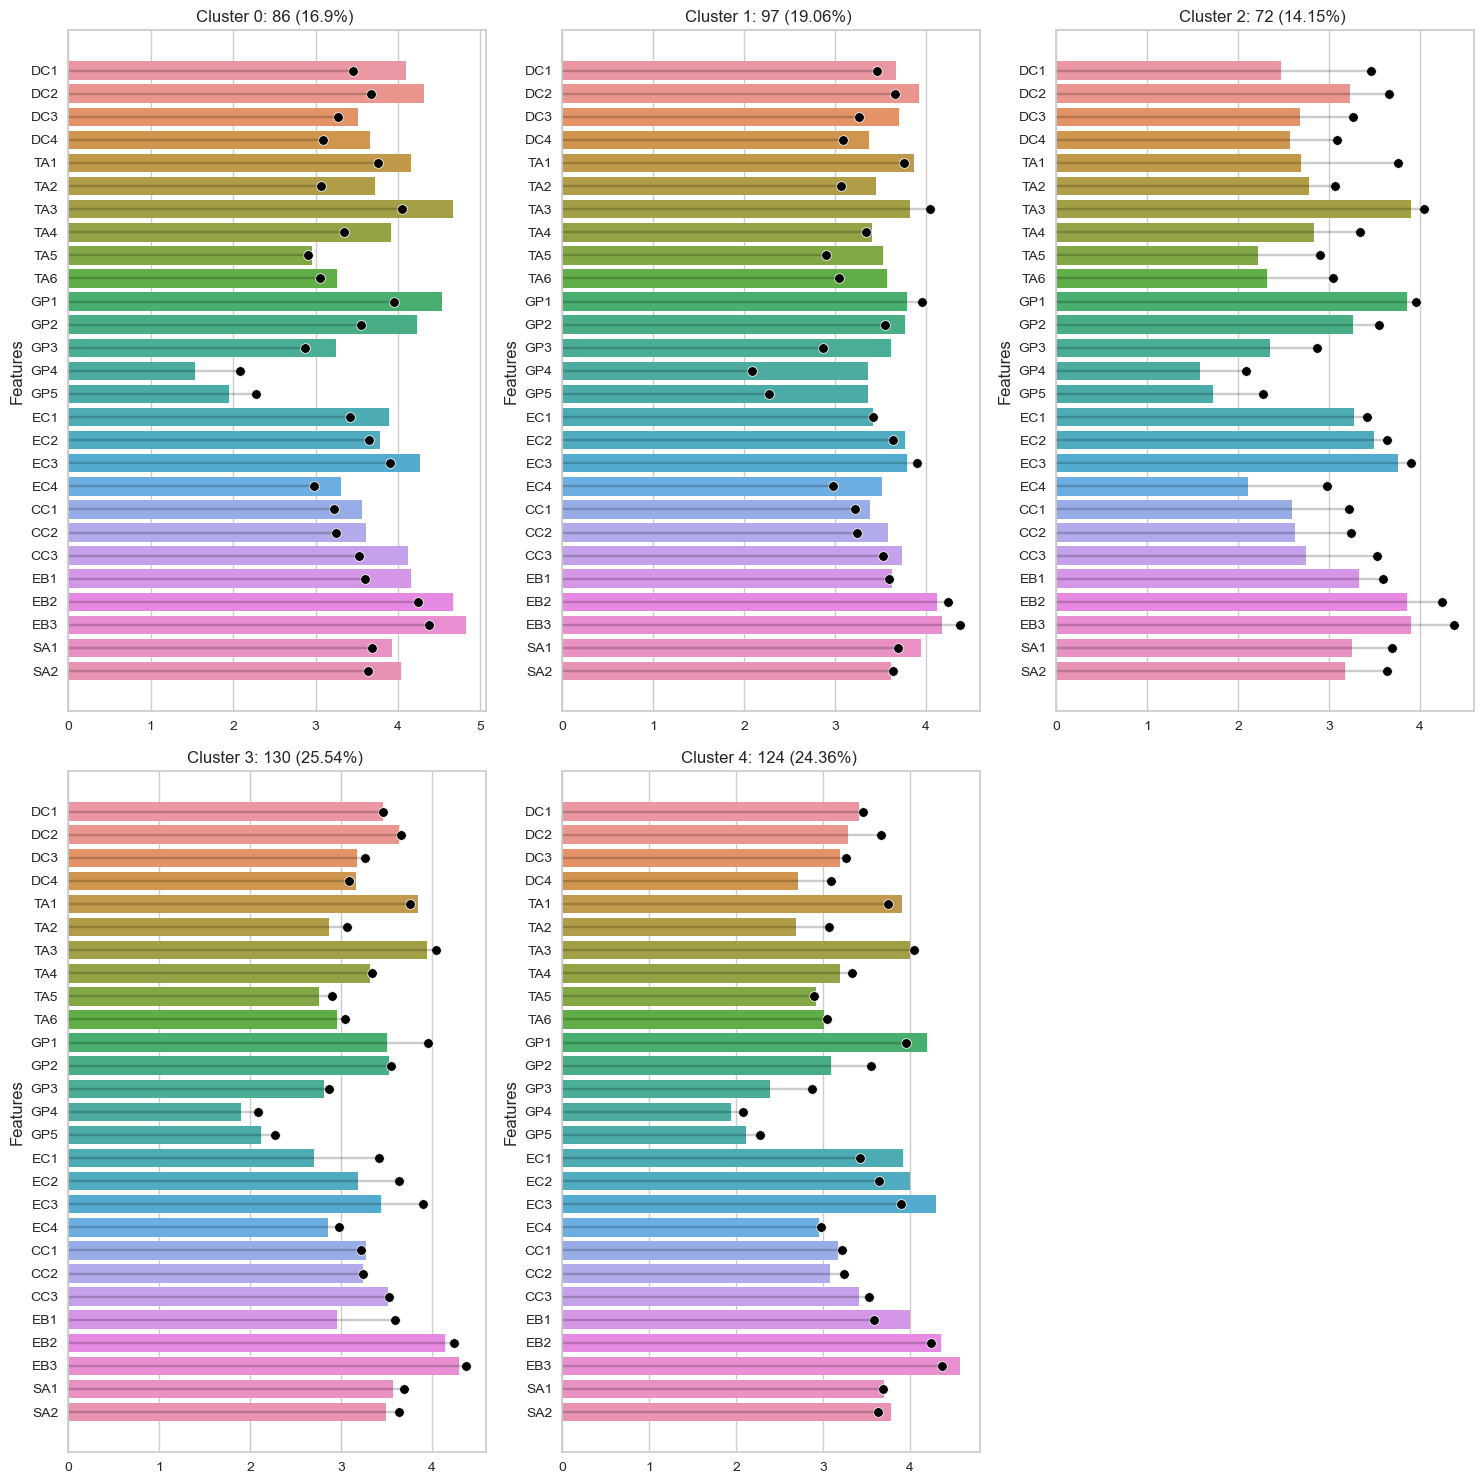

In [31]:
fig, ax = plt.subplots(2,3,figsize= (15,15))
ax = ax.ravel()
ax[5].axis('off')
for i in range(0,5):
    col = df3[df3['clusters']==i].groupby(['clusters']).mean().iloc[:,10:-4].columns
    val = df3[df3['clusters']==i].groupby(['clusters']).mean().iloc[:,10:-4].values[0]
    ind = df3[df3['clusters']==i].groupby(['clusters']).mean().iloc[:,10:-4].index
    sns.barplot(x =val, y = col, ax = ax[i])
    sns.scatterplot(x = df3.iloc[:,10:-5].mean(), y = df3.iloc[:,10:-5].columns, color = 'black', ax=ax[i])
    ax[i].hlines(y = df3.iloc[:,10:-5].columns, xmin = 0, xmax = df3.iloc[:,10:-5].mean(), colors='black', alpha = 0.2)
    count_per = (df3['clusters'].value_counts(normalize=True)[i]*100).round(2)
    ax[i].set_title(f"Cluster {i}: {df3['clusters'].value_counts()[i]} ({count_per}%) ")
    ax[i].set_ylabel("Features")
    

    plt.tight_layout()
plt.show()